<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5B%EC%A4%91%EC%8B%AC%EA%B7%B9%ED%95%9C%EC%A0%95%EB%A6%AC%5DCentral_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Central Limit Theorem

If we have a population and we take sufficiently large samples from it, then the sample means (the average of each sample) will be approximately normally distributed


In [1]:
import numpy as np
import seaborn as sns
import statistics as stat

## 정규 분포를 기반으로 CLT 적용해보기

In [2]:
x = np.random.normal(size=10000) # 표준 정규 분포 데이터 생성

In [3]:
len(x)

10000

In [4]:
x[0:10]

array([-0.22917384,  0.83073989, -0.66906166,  2.02624694,  0.31364461,
       -0.99006943, -0.93014666,  1.20405407, -0.23959634, -2.52806964])

In [5]:
max(x)

3.825729406109202

In [6]:
min(x)

-3.9680809213757122

In [7]:
stat.mean(x)

0.0011895631655689342

In [8]:
stat.stdev(x)

0.9975733894884284

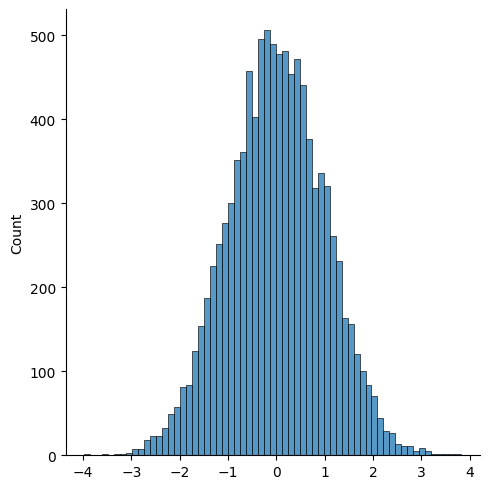

In [9]:
sns.displot(x)

### 정규분포 모집단에서 샘플해보기

In [10]:
# replace를 False로 지정하면 여기서 샘플된 데이터들은 x에서 제거된다
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-1.22490559, -0.58774661,  0.43665556,  1.33204146, -0.48196803,
        1.44346223, -0.84365859, -0.34923791, -0.69976875, -0.52537151])

In [11]:
stat.mean(x_sample)

-0.15004977296024224

In [12]:
stat.stdev(x_sample)

0.9129310445270191

In [13]:
def sample_mean(population, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    sample_means.append(sample_mean)
  print(stat.mean(sample_means),stat.stdev(sample_means))
  return sample_means

-0.10888758272690291 0.19098500372512076


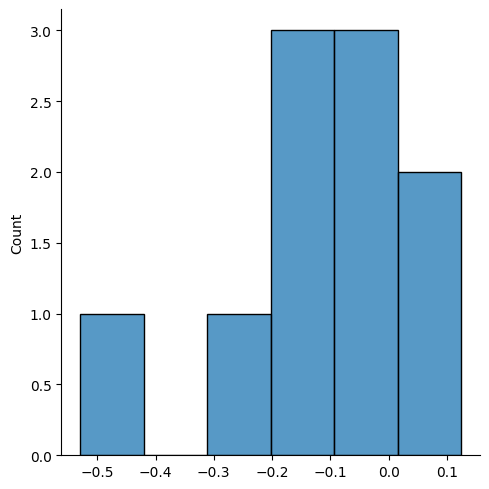

In [15]:
#모집단 x 10개의 샘플
sns.displot(sample_mean(x, 10, 10))

0.0011091057142931108 0.3256549546296309


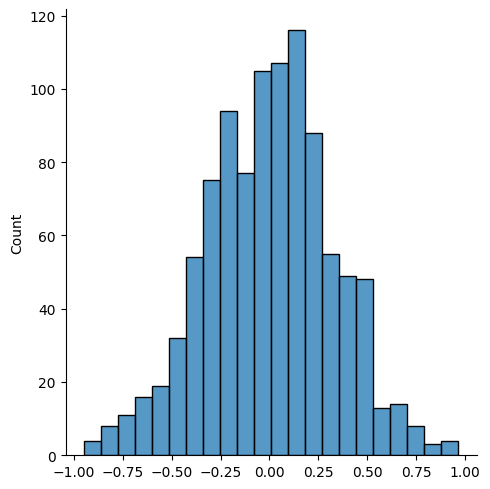

In [16]:
sns.displot(sample_mean(x, 10, 1000))

0.0017880811914190373 0.03049605580546872


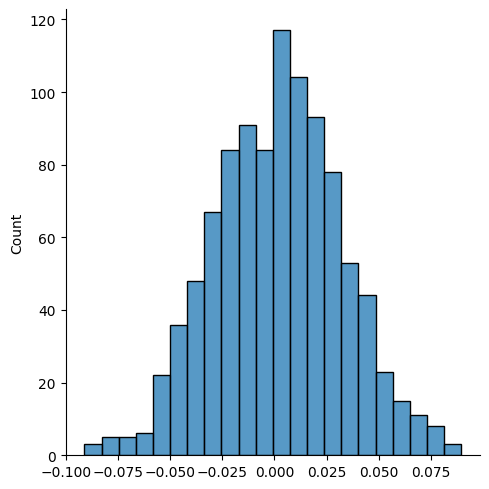

In [17]:
sns.displot(sample_mean(x, 1000, 1000))

0.0009264083044240667 0.017492754301264145


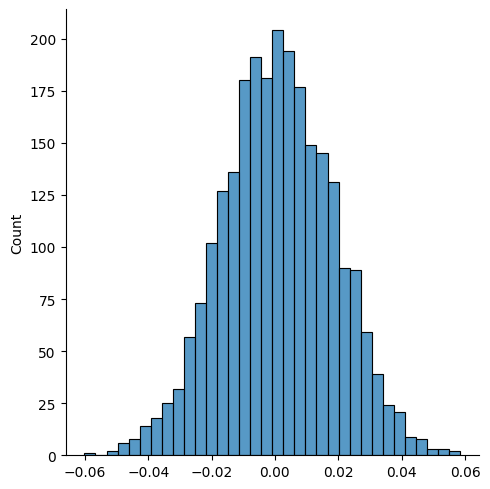

In [18]:
sns.displot(sample_mean(x, 2500, 2500))

## Skewed 분포를 갖는 모집단에서 샘플링해보기

In [19]:
from scipy.stats import skewnorm

s = skewnorm.rvs(12, size=10000)   # 첫번째 값이 0이면 정규분포가 리턴됨

In [20]:
stat.mean(s)

0.7891240558622564

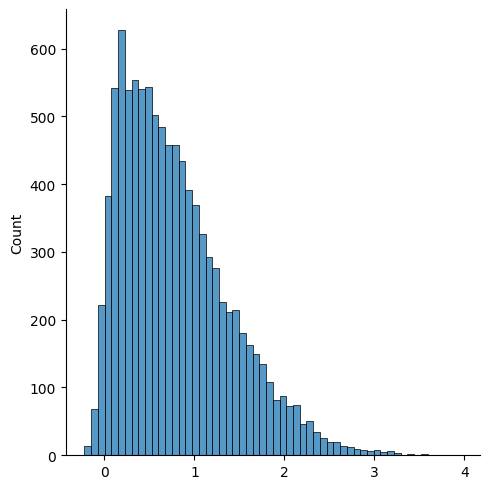

In [21]:
sns.displot(s)

0.7859280200257441 0.19486494308004537


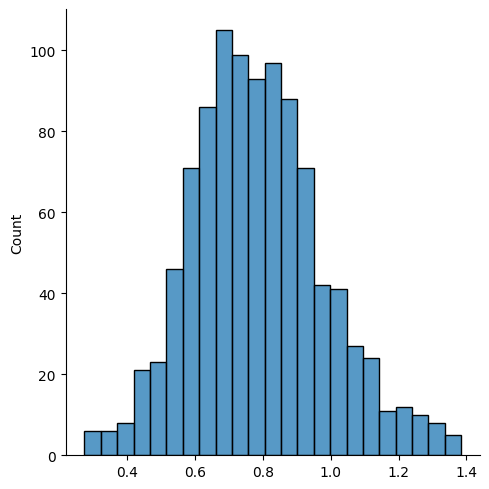

In [22]:
sns.displot(sample_mean(s, 10, 1000))

0.7892034949954723 0.018898030334950525


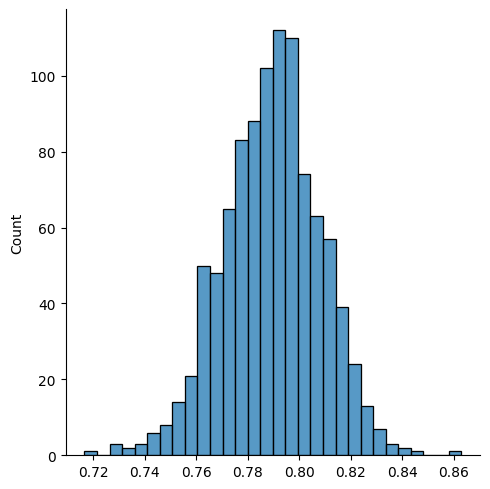

In [23]:
sns.displot(sample_mean(s, 1000, 1000))

## Multimodal 분포를 갖는 모집단에서 샘플링해보기

In [24]:
m = np.concatenate((np.random.normal(size=10000), np.random.normal(loc = 4.0, size=10000)))

In [25]:
stat.mean(m)

2.0029712457627373

In [26]:
stat.stdev(m)

2.2520334536685533

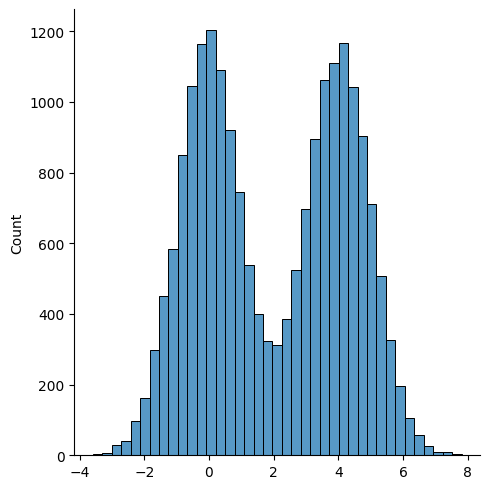

In [27]:
sns.displot(m)

2.0005086226137347 0.06900931453624702


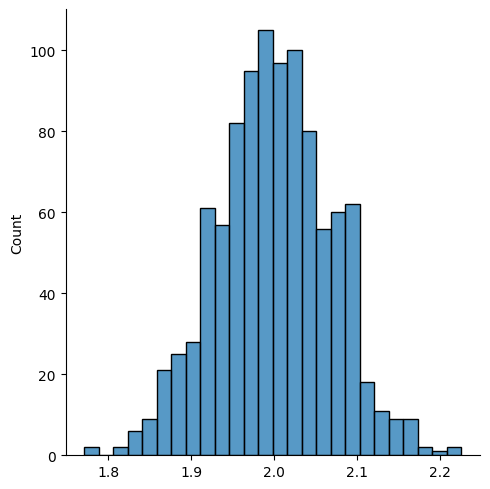

In [28]:
sns.displot(sample_mean(m, 1000, 1000))

## Uniform 분포를 갖는 모집단에서 샘플링하기

In [29]:
u = np.random.uniform(size=10000)

In [30]:
stat.mean(u)

0.49812094409809626

In [31]:
stat.stdev(u)

0.2890803374370016

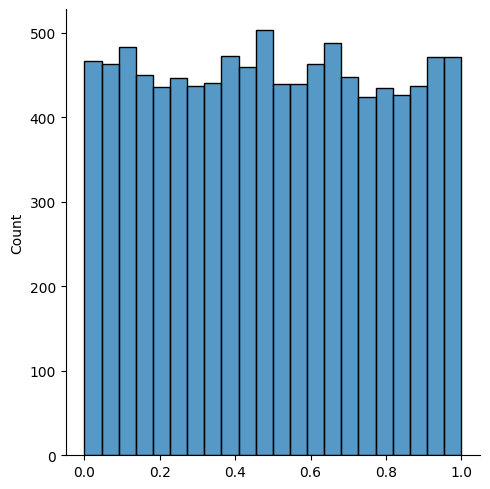

In [32]:
sns.displot(u, kde=False)

0.49796959498658255 0.008950604158416291


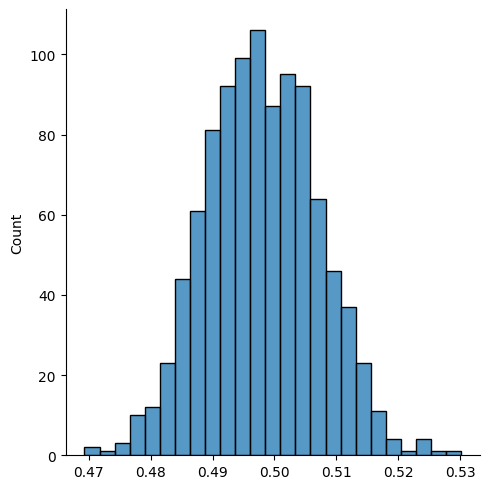

In [33]:
sns.displot(sample_mean(u, 1000, 1000))

모집단에서 샘플링한 것의 평균은 정규분포 형태로 바뀐다.